In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
import imageio

In [2]:
DATA_DIR = '../data/'
FILE_NAME = 'data_1960.csv'
OUT_GIF_NAME = 'evolution.gif'

data = pd.read_csv(DATA_DIR + FILE_NAME)
data

,dt,AverageTemperature,Latitude,Longitude,dt_float
0,1959-12-01,2.229,57.05,10.33,1960.002740
1,1960-01-01,-0.657,57.05,10.33,1960.086073
2,1960-02-01,-1.359,57.05,10.33,1960.169406
3,1960-03-01,2.339,57.05,10.33,1960.252740
4,1960-04-01,5.919,57.05,10.33,1960.336073
...,...,...,...,...,...
2264385,2013-04-01,7.710,52.24,5.26,2013.336073
2264386,2013-05-01,11.464,52.24,5.26,2013.419406
2264387,2013-06-01,15.043,52.24,5.26,2013.502740
2264388,2013-07-01,18.775,52.24,5.26,2013.586073


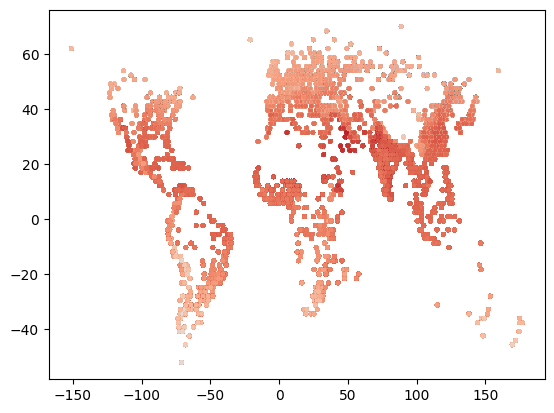

In [3]:
# see the plot of the data to see average temperature over time
plt.scatter(data['Longitude'], data['Latitude'], c=data['AverageTemperature'], cmap='coolwarm', s=5) # s is the size of the dots

In [4]:
# slice the dataset year by year and save the data to a new dataset
years = np.arange(1961, 2014, 1)
datasets = []
for year in years:  
    data_year = data[(data['dt_float'] <= year) & (data['dt_float'] >= year-1)]
    datasets.append(data_year)

/tmp/ipykernel_111479/510186150.py:18: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread('temp.png'))


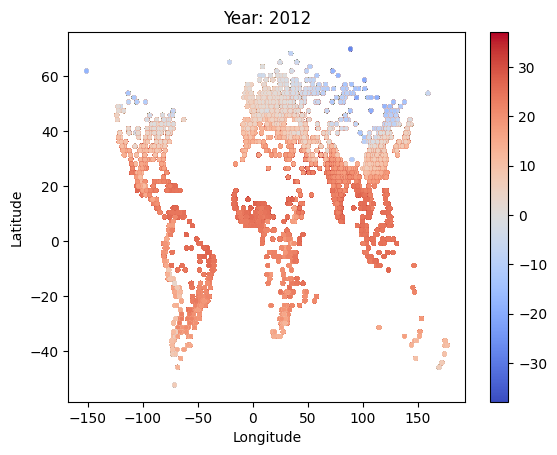

In [5]:
# Create a list of images (plot)
images = []

for i in range(len(datasets)):
    # delete all the previous plots but preserve the axis and colorbar
    plt.sca(plt.gca())


    plt.scatter(datasets[i]['Longitude'], datasets[i]['Latitude'], c=datasets[i]['AverageTemperature'], cmap='coolwarm', s=5) # s is the size of the dots
    plt.title('Year: ' + str(math.floor(datasets[i]['dt_float'].max())))
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')

    if i == 0:
        plt.colorbar()
    
    plt.savefig('temp.png')
    images.append(imageio.imread('temp.png'))

# remove the temporary file
os.remove('temp.png')


In [6]:
imageio.mimwrite(DATA_DIR + OUT_GIF_NAME, images, duration=500, loop=1) # duration is the time between frames in milliseconds, eg 500 = 2 fps

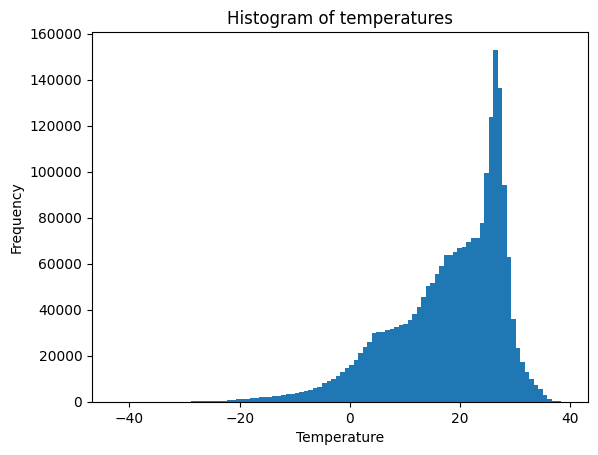

In [3]:
# hists of the temperatures
plt.hist(data['AverageTemperature'], bins=100)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of temperatures')
plt.show()